## Carga del archivo

In [1]:
#Importación de librerias necesarias para la carga
import pandas as pd


In [121]:
# Importación de data set en una variable llamada "df"
df=pd.read_csv("dataset.csv")

## Diccionario de variables

**age**: Edad del individuo en años.

**sex**: Género del individuo, con valores "male" o "female".

**bmi**: Índice de Masa Corporal (Body Mass Index), una medida de relación entre peso y altura.

**children**: Número de hijos o dependientes del individuo.

**smoker**: Indica si el individuo es fumador ("yes") o no ("no").

**region**: Región geográfica donde reside el individuo, con valores "northeast", "northwest", "southeast" y "southwest".

**charges**: Costo del seguro médico para el individuo.

## Contexto del tópico elegido

Para este proyecto, elegí el dataset de Predicción de Gastos Médicos porque permite analizar cómo distintos factores personales y de estilo de vida influyen en los costos de la atención médica. Las variables incluidas, como la edad, el índice de masa corporal (BMI), el tabaquismo y la cantidad de hijos, ofrecen una buena base para explorar qué elementos tienen mayor impacto en los gastos de salud.

Este dataset es particularmente interesante porque aborda un tema relevante tanto para individuos como para aseguradoras y el sistema de salud en general. Entender qué factores aumentan los costos médicos puede ayudar a mejorar la planificación de seguros y a desarrollar estrategias de prevención más efectivas. Por ejemplo, podríamos analizar si las personas fumadoras o con un BMI elevado tienden a generar mayores gastos médicos, lo que brindaría información valiosa para campañas de salud pública.

## Exploración y visualización del dataset

In [5]:
# Realizamos una vista previa de como está estructurado nuestro dataset.
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
# Vemos cuantas filas y columnas tiene nuestro dataset
df.shape

(1338, 7)

In [11]:
# Visualizamos la información básica sobre nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Visualizamos las columnas que tiene nuestro dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Limpieza del dataset

In [14]:
# Verificamos si existen valores nulos
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [125]:
# Verificamos si existen valores duplicados.
df.duplicated().sum()

1

In [126]:
# Eliminamos las filas duplicadas y verificamos que se hayan eliminado
df = df.drop_duplicates()
df.duplicated().sum()

0

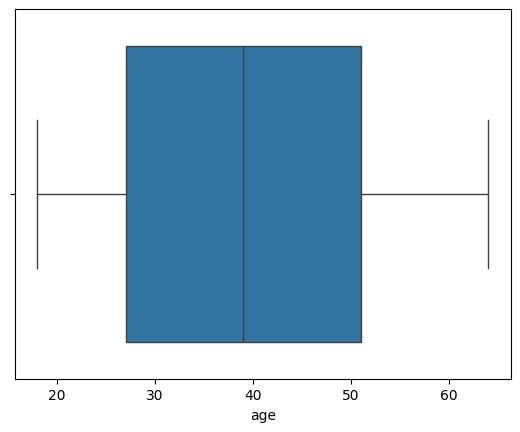

In [18]:
# Verificamos que no haya outliers en la columna 'age'
sns.boxplot(x=df['age'])
plt.show()


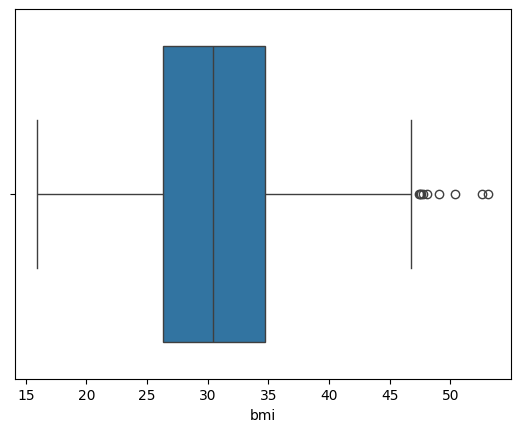

In [127]:
# Verificamos que no haya outliers en la columna 'bmi'
sns.boxplot(x=df['bmi'])
plt.show()

In [128]:
# Identificamos los outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))]
print(outliers)

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


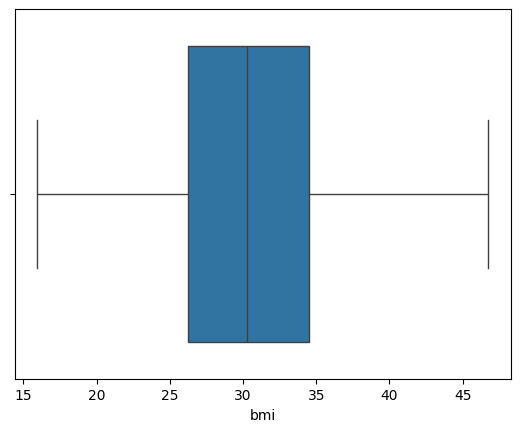

In [129]:
# Eliminamos los outliers
df = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]

# Volvemos a imprimir el gráfico para validar que se hayan eliminado los outliers
sns.boxplot(x=df['bmi'])
plt.show()

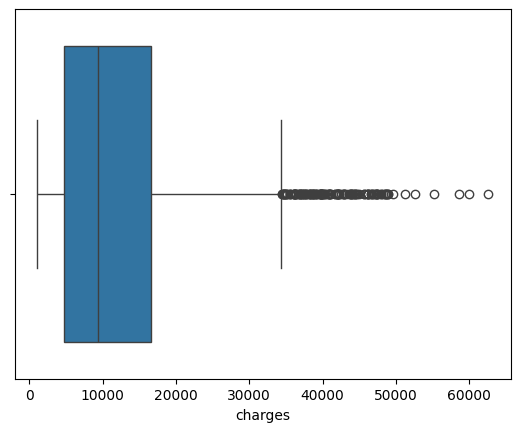

In [28]:
# Verificamos que no haya outliers en la columna 'charges'
sns.boxplot(x=df['charges'])
plt.show()

In [31]:
# Identificamos los outliers
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))]
print(outliers)

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[138 rows x 7 columns]


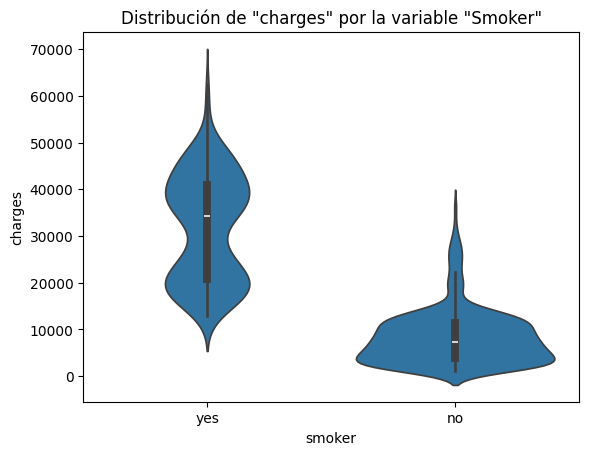

In [49]:
# Verificamos la naturaleza de los outliers
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Distribución de "charges" por la variable "Smoker"')
plt.show()

Con este gráfico, concluimos que, aunque existen outliers en la columna "charges", no necesariamente indican un error en los datos. Los valores más altos de "charges" se concentran principalmente en las personas que son fumadoras, lo que sugiere que estos valores son naturales y explicables dentro del contexto. Esta observación tiene sentido, ya que, en general, los fumadores suelen enfrentar mayores costos médicos debido a los riesgos para la salud asociados con el tabaco, lo que podría reflejarse en los cargos más altos. Por lo tanto, aunque estos valores sean atípicos según la fórmula del IQR, no representan errores, sino una variabilidad válida en los datos que refleja una característica significativa, como el hábito de fumar.

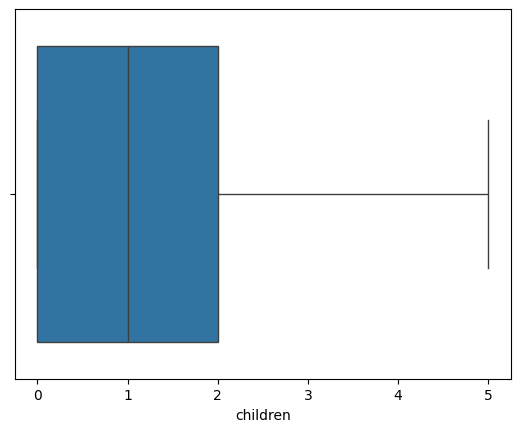

In [50]:
# Verificamos que no haya outliers en la columna 'children'
sns.boxplot(x=df['children'])
plt.show()

## Análisis estadístico

### Estadísticas y gráficos de variables

In [131]:
# Visualizamos nuestras variables numericas
df.describe()

,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


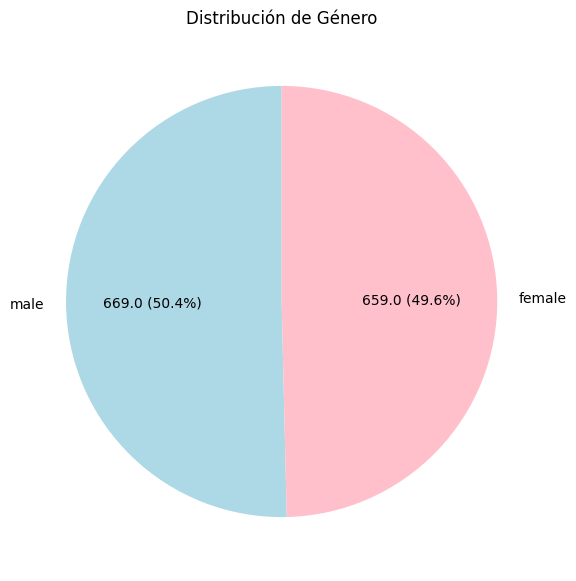

In [82]:
# Visualizamos la cantidad de hombres y mujeres que tenemos en nuestro dataset
gender_counts = df['sex'].value_counts()
def func(pct, allvals):
    absolute = round(pct / 100.*sum(allvals), 0)
    return f"{absolute} ({pct:.1f}%)"
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribución de Género')
plt.show()


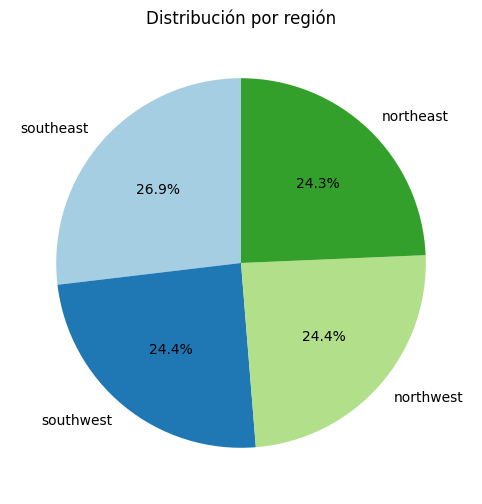

In [85]:
# Visualizamos la división por regiones
region_counts = df['region'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución por región')
plt.show()


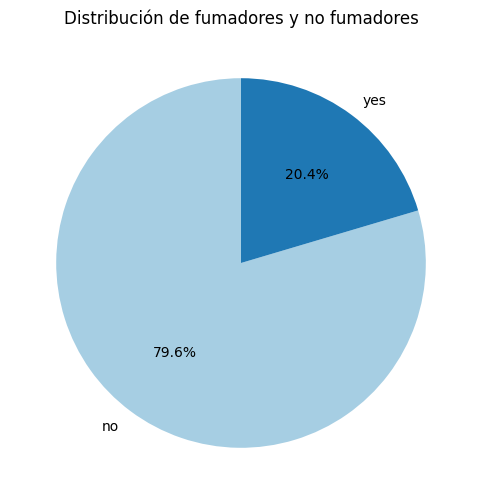

In [86]:
# Visualizamos la cantidad de fumadores y no fumadores
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de fumadores y no fumadores')
plt.show()


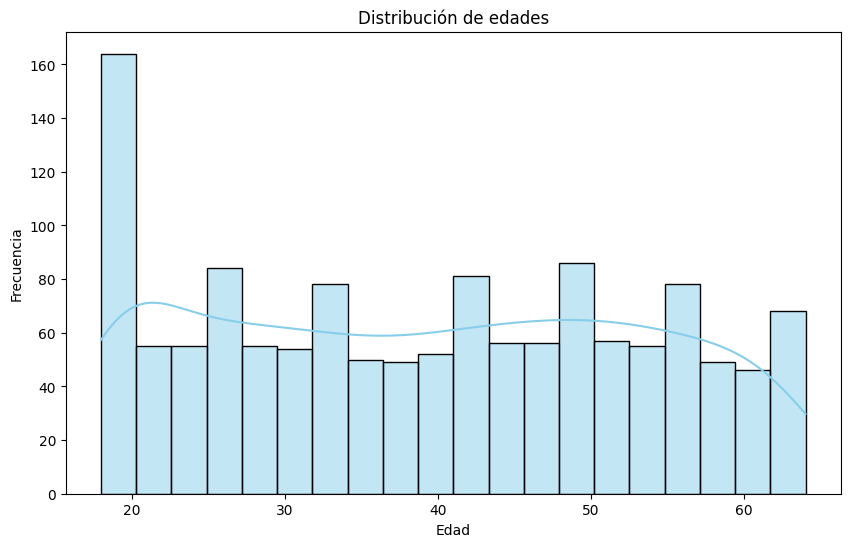

In [87]:
# Visualizamos en un histograma la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


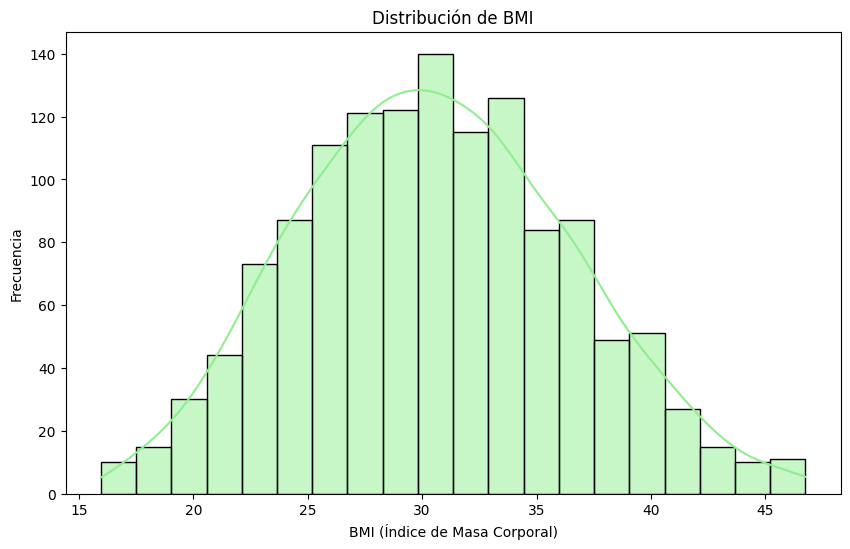

In [88]:
# Visualizamos en un histograma la distribución de BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de BMI')
plt.xlabel('BMI (Índice de Masa Corporal)')
plt.ylabel('Frecuencia')
plt.show()


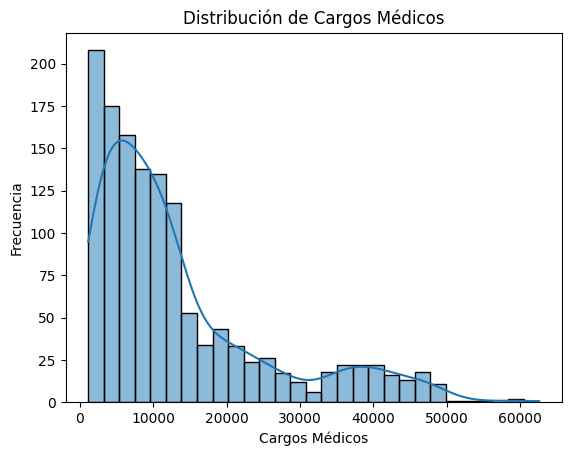

In [75]:
# Gráfico de distribución de cargos médicos(charges)
sns.histplot(df['charges'], kde=True)
plt.title('Distribución de Cargos Médicos')
plt.xlabel('Cargos Médicos')
plt.ylabel('Frecuencia')
plt.show()


Este gráfico nos muestra cómo se distribuyen los cargos médicos en el conjunto de datos. Como se puede ver, hay muchos casos con cargos bajos, pero también algunos pocos con cargos extremadamente altos. Esto no es raro en los datos de salud, ya que generalmente la mayoría de los pacientes tiene gastos moderados, pero siempre hay un pequeño grupo con necesidades médicas mucho más costosas, como tratamientos o enfermedades graves.

### Gráficos de comparación de variables

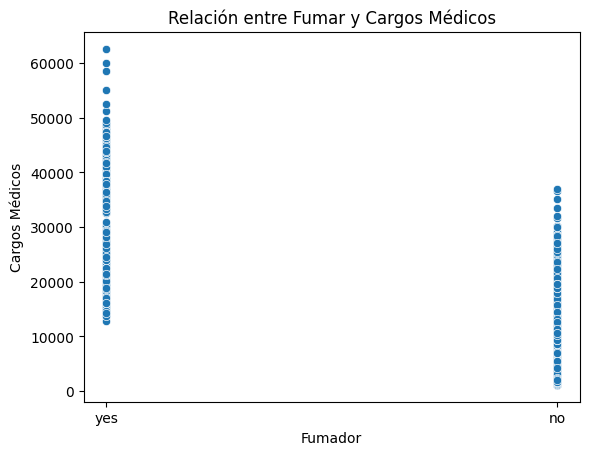

In [77]:
sns.scatterplot(x='smoker', y='charges', data=df)
plt.title('Relación entre Fumar y Cargos Médicos')
plt.xlabel('Fumador')
plt.ylabel('Cargos Médicos')
plt.show()


El gráfico de dispersión presenta la relación entre si una persona es fumadora (smoker) y sus cargos médicos (charges). Al observar los datos, se puede ver claramente que los fumadores tienden a tener cargos médicos más altos en comparación con los no fumadores. Esta tendencia puede explicarse por los riesgos de salud asociados al tabaquismo, como enfermedades respiratorias y cardiovasculares, que a menudo requieren tratamientos médicos más costosos.

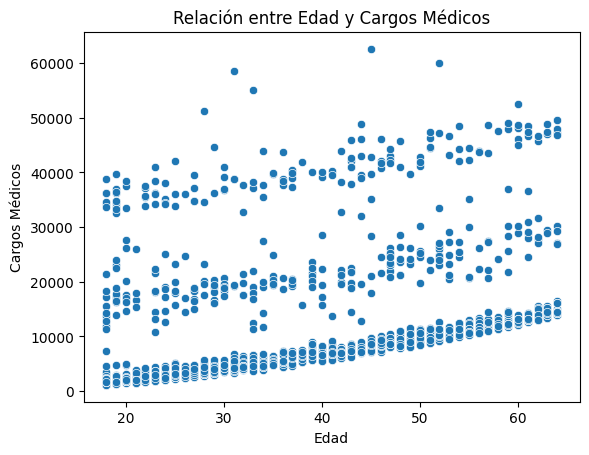

In [89]:
# Relación entre Edad y Cargos Médicos
sns.scatterplot(x=df['age'], y=df['charges'])
plt.title('Relación entre Edad y Cargos Médicos')
plt.xlabel('Edad')
plt.ylabel('Cargos Médicos')
plt.show()


Al mirar la relación entre la edad y los cargos médicos, se puede ver que, en general, a medida que la gente se hace mayor, los costos médicos también tienden a aumentar. Esto tiene sentido, ya que las personas mayores suelen tener más problemas de salud y, por lo tanto, necesitan más atención médica. Sin embargo, también hay algunos casos donde los cargos no siguen exactamente esa tendencia, lo que sugiere que hay otros factores en juego, como el estilo de vida de cada persona o enfermedades previas. En resumen, aunque parece que la edad está relacionada con los cargos médicos, no siempre es así y hay varias razones que pueden explicar esa variabilidad.

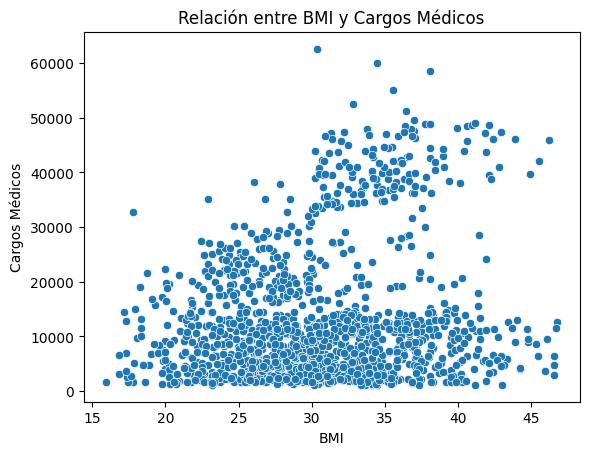

In [90]:
# Relación entre BMI y Cargos Médicos
sns.scatterplot(x=df['bmi'], y=df['charges'])
plt.title('Relación entre BMI y Cargos Médicos')
plt.xlabel('BMI')
plt.ylabel('Cargos Médicos')
plt.show()


Al analizar la relación entre el índice de masa corporal (BMI) y los cargos médicos, se observa que, en general, las personas con un BMI más alto tienden a tener costos médicos más elevados. Esto se puede explicar por el hecho de que un BMI más alto está asociado con un mayor riesgo de enfermedades crónicas como la diabetes, hipertensión y problemas cardíacos, lo que generalmente lleva a mayores gastos médicos. Aunque no todos los casos siguen esta tendencia, parece que un BMI elevado sí juega un papel importante en el aumento de los costos de atención médica. Sin embargo, también es importante tener en cuenta que hay otros factores que podrían influir en estos costos.

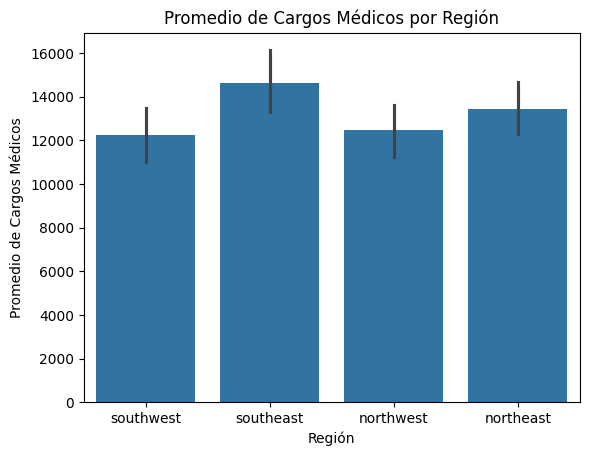

In [97]:
# Gráfico de barras de medias para comparar cargos médicos entre las regiones
sns.barplot(x='region', y='charges', data=df, estimator='mean')
plt.title('Promedio de Cargos Médicos por Región')
plt.xlabel('Región')
plt.ylabel('Promedio de Cargos Médicos')
plt.show()


Al mirar el promedio de cargos médicos por región vemos que la región sureste es la que tiene los gastos mas altos, seguida por región noreste y luego por suroeste y noroeste en igual medida. Sin embargo, las diferencias que se encuentran no son tan amplias, lo que sugiere que no hay una gran disparidad entre los cargos medicos entre las regiones.

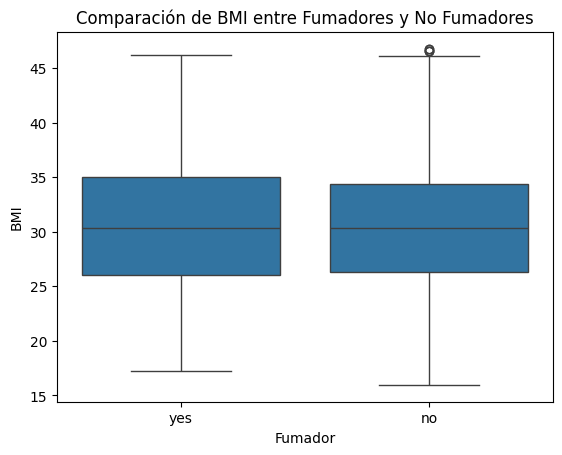

In [94]:
# Comparación de BMI entre Fumadores y No Fumadores
sns.boxplot(x='smoker', y='bmi', data=df)
plt.title('Comparación de BMI entre Fumadores y No Fumadores')
plt.xlabel('Fumador')
plt.ylabel('BMI')
plt.show()


Al comparar el BMI entre fumadores y no fumadores, vemos que, en promedio, los fumadores tienden a tener un BMI un poco más alto. Sin embargo, la diferencia no es tan grande. Esto sugiere que, aunque puede haber una ligera tendencia, el fumar no parece ser un factor determinante en el índice de masa corporal por sí solo. Puede que haya otros factores en juego, pero lo cierto es que la diferencia no es lo suficientemente significativa como para sacarla como una regla general.

<ipython-input-98-3797e1100fe1>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='charges', data=df, ci=None)


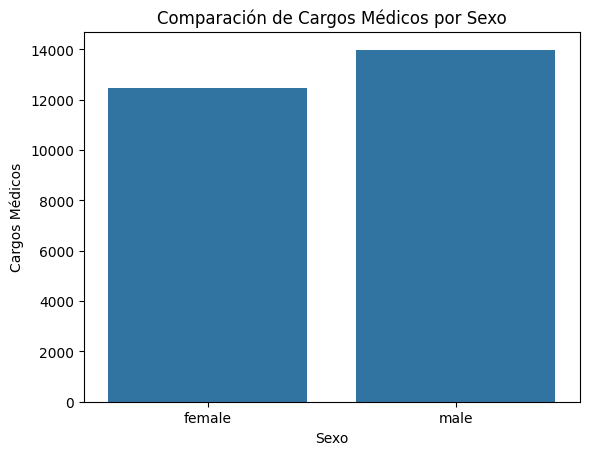

In [98]:
# Comparación de cargos médicos por sexo
sns.barplot(x='sex', y='charges', data=df, ci=None)
plt.title('Comparación de Cargos Médicos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cargos Médicos')
plt.show()


En este gráfico podemos ver cómo se comparan los cargos médicos entre hombres y mujeres. Como se puede ver, los hombres tienen un promedio de gasto de unos 14,000, mientras que las mujeres están un poquito por encima de los 12,000. Aunque hay una diferencia, no es tan grande, lo que indica que, en general, el sexo no tiene un impacto tan fuerte en los cargos médicos, pero sí parece que los hombres tienden a gastar un poco más.

## Resumen de hallazgos

A partir del análisis realizado se identificaron algunos patrones interesantes en el conjunto de datos:

1. Relación entre fumar y cargos médicos: Se observa que los fumadores tienen un gasto médico significativamente mayor en comparación con los no fumadores. Esto tiene sentido, ya que fumar es un factor de riesgo conocido para una serie de enfermedades, lo que se refleja en los mayores costos médicos asociados.

2. Distribución de cargos médicos por región: Los datos muestran que los cargos médicos varían dependiendo de la región. La región del southeast tiene un gasto promedio más alto, mientras que el southwest y northwest presentan cargos médicos más bajos, aunque la diferencia no es enorme.

3. Comparación entre hombres y mujeres: Si bien los hombres tienen un gasto médico promedio más alto que las mujeres, la diferencia no es tan significativa. Esto sugiere que, en general, los cargos médicos no dependen fuertemente del sexo, aunque los hombres tienden a gastar un poco más.

4. Relación entre el índice de masa corporal (BMI) y los cargos médicos: Los individuos con un BMI más alto tienden a tener cargos médicos más altos, lo que podría estar relacionado con problemas de salud como la obesidad. Sin embargo, la relación no es tan pronunciada como en el caso de los fumadores.

5. Edad y cargos médicos: Los adultos mayores, como era de esperarse, tienden a tener cargos médicos más altos. La tendencia muestra que a medida que la edad aumenta, también lo hacen los gastos médicos, lo que refleja el mayor riesgo de enfermedades y condiciones de salud asociadas con el envejecimiento.

En resumen, podemos concluir en que factores de riesgo como fumar, tener un BMI mas alto del promedio o la edad, tienen un impacto importante en los cargos médicos, mientras que el sexo y la región parecen influir pero en menor medida.

## Definición del problema y modelo a implementar

El problema se quiere resolver es predecir los cargos médicos de una persona usando información como su edad, sexo, peso (BMI), si fuma o no, y en qué región vive. Elegí usar un Random Forest porque es un modelo que puede manejar bien este tipo de datos, donde las relaciones entre las características de las personas no siempre son fáciles de entender o lineales. Por ejemplo, el impacto de ser fumador en los cargos médicos puede ser diferente según otros factores, como la edad o el sexo. Random Forest es útil porque puede identificar estas relaciones complejas y hacer predicciones precisas sin necesidad de hacer muchas suposiciones. Es un modelo muy bueno para este tipo de problemas porque se adapta bien a los datos que tenemos, y nos ayudará a entender mejor cómo los diferentes factores influyen en los gastos médicos.

Para entrenar el modelo de machine learning, es importante que elijamos cuales son las caracteristicas mas relevantes que tenemos. En nuestro caso, las variables que consideramos más importantes  para predecir los posibles gastos medicos son:

1. Fumador o no: El tabaquismo es un factor de riesgo conocido para muchas enfermedades, lo que puede aumentar considerablemente los gastos médicos. Por lo tanto, esta variable es esencial para nuestro modelo.

2. Edad: A medida que las personas envejecen, es común que enfrenten más problemas de salud, lo que puede aumentar los gastos médicos. Por lo tanto, creemos que la edad tiene una relación directa con los cargos médicos.

3. BMI (Índice de Masa Corporal): El BMI es un indicador importante de la salud general de una persona. Aquellos con un BMI más alto (sobrepeso u obesidad) tienden a tener más problemas de salud, lo que puede generar mayores cargos médicos.

4. Sexo: Aunque no es un factor determinante en todos los casos, hay estudios que sugieren que los hombres y las mujeres pueden tener patrones de salud y gastos médicos diferentes, por lo que esta variable puede ser relevante.

5. Región: Vivir en diferentes regiones puede implicar distintos costos médicos debido a factores como la disponibilidad de servicios de salud, políticas locales y el costo de la atención médica.

Estas características son las que creemos que tienen un impacto significativo en los cargos médicos y, por lo tanto, son las que vamos a utilizar para entrenar el modelo. Al centrarnos en estas variables, podemos hacer que el modelo aprenda mejor las relaciones entre ellas y los cargos médicos, lo que nos permitirá hacer predicciones más precisas.

## Implementación y entrenamiento del modelo

In [105]:
# Importamos las librerias necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [132]:
# Creamos una copia el data set en la cual vamos a trabajar el modelo

df_copy = df.copy()

In [135]:
# Codificamos las variables categóricas
label_encoder = LabelEncoder()

df_copy['sex'] = label_encoder.fit_transform(df_copy['sex'])  # female = 0, male = 1
df_copy['smoker'] = label_encoder.fit_transform(df_copy['smoker'])  # yes = 1, no = 0
df_copy['region'] = label_encoder.fit_transform(df_copy['region'])  # Southwest = 0, Southeast = 1, Northwest = 2, Northeast = 3


In [139]:
# Características (X) y variable objetivo (y)
X = df_copy.drop('charges', axis=1)
y = df_copy['charges']

In [173]:
# Dividimos los datos entre los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Creamos el modelo Random Forest
model = RandomForestRegressor(n_estimators=500, random_state=42)

In [175]:
# Entrenamos el modelo
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [176]:
# Realizamos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [184]:
# Evaluamos el rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio (MAE): {mae}')

Error absoluto medio (MAE): 2883.1944412418025


In [185]:
# Calculamos el coeficiente de determinacion(R²) ver que tan preciso es nuestro modelo

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.8098816907883272


## Conclusiones y resultados del modelo

### Resumen del modelo y objetivo buscado

El objetivo de este proyecto fue construir un modelo predictivo utilizando un Random Forest para lograr predecir los cargos médicos de los pacientes, basandonos en caracteristicas como edad, indice de masa corporal(BMI), número de hijos, sexo, si son o no fumadores y región de residencia. Me incliné por el uso de este modelo ya que funciona muy bien con variables numéricas y categóricas.

### Resultados del modelo

Para cuantificar el rendimiento del modelo tomamos dos métricas que nos ayudarán a entender la precisión del mismo:

**R² (Coeficiente de determinación)**: El R² mide qué porcentaje de la variabilidad de los datos nuestro modelo puede explicar. Su valor varía entre 0 y 1, donde 1 indica un modelo perfecto y 0 significa que el modelo no explica nada de los datos.
En nuestro caso, obtuvimos un R² de 0.81, lo que significa que el 81% de la variación en los gastos médicos puede ser explicada por nuestro modelo. Esto indica que el modelo ha logrado capturar bien la relación entre las variables y la variable objetivo (charges), haciendo predicciones bastante precisas en la mayoría de los casos.

**MAE (Error Absoluto Medio)**: El MAE mide, en promedio, cuánto se equivoca el modelo en sus predicciones. En otras palabras, nos dice cuánto se desvía la predicción del valor real en unidades monetarias.
El resultado obtenido fue un MAE de 2883, lo que significa que, en promedio, el modelo se equivoca por 2883 unidades monetarias en cada predicción. Aunque el error puede parecer grande, si lo comparamos con la media de los cargos médicos (13,221), el error representa solo aproximadamente 22% de la media, lo que es razonable para este tipo de problemas.

Para entender de una forma mas visible el modelo tenemos los siguientes gráficos

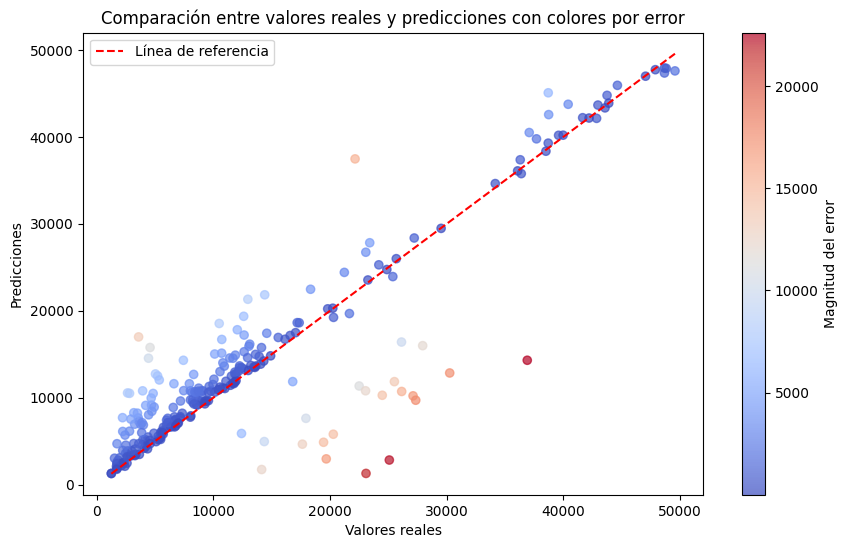

In [187]:
# Calculamos la diferencia entre las predicciones y los valores reales
differences = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c=np.abs(differences), cmap='coolwarm', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones con colores por error')
plt.colorbar(label='Magnitud del error')
plt.legend()
plt.show()

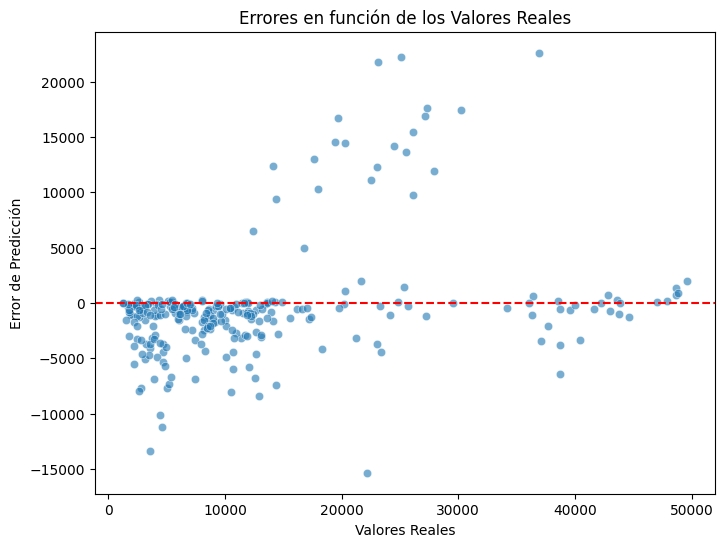

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=errores, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Error de Predicción')
plt.title('Errores en función de los Valores Reales')
plt.show()


Como podemos notar en estos dos cuadros los valores del modelo(puntos azules) estan bastante alineados a los valores esperados(linea roja). Esto nos indica que si bien hay margen de mejora, los resultados del modelo son muy positivos.

## Propuesta de implementación

Una de las formas en las que se podría utilizar este modelo de predicción de gastos médicos es en la industria de seguros de salud. Las aseguradoras podrían aplicar el modelo para predecir los costos médicos futuros de sus clientes, basándose en características como la edad, el índice de masa corporal, si fuman o no, y la región en la que viven. Esto les permitiría ajustar las tarifas de las pólizas según el riesgo que representa cada cliente, haciendo que los precios sean más justos y personalizados.

Además, el modelo podría ayudar a las aseguradoras a evaluar mejor los riesgos de sus clientes y, en lugar de aplicar tarifas fijas, podrían ofrecer precios más competitivos para clientes de bajo riesgo y tarifas más altas para aquellos con mayor probabilidad de generar gastos médicos elevados. Esto no solo beneficiaría a la empresa al mejorar su rentabilidad, sino que también permitiría que los clientes reciban planes más adecuados a sus necesidades.

Este modelo podría aumentar la precisión de sus predicciones si se pudieran incluir más datos, como enfermedades preexistentes o el historial médico familiar de los clientes. Estos factores adicionales permitirían una mejor evaluación de los riesgos y, por lo tanto, una predicción más exacta de los gastos médicos futuros. Con esta información extra, las aseguradoras podrían ajustar aún más las tarifas de las pólizas y ofrecer opciones más personalizadas a cada cliente, basándose en un análisis mucho más completo de su salud y antecedentes.